In [430]:
import pandas as pd #verisetini okutmak için 
import numpy as np 
from sklearn.ensemble import ExtraTreesClassifier #feature importance için
from sklearn.feature_selection import SelectKBest #öznitelik skorlandırma
from sklearn.feature_selection import chi2
import seaborn as sns #ısı haritası için
from sklearn.preprocessing import MinMaxScaler #normalizasyın
from sklearn.preprocessing import StandardScaler #standartlaştırma
from sklearn.model_selection import train_test_split #veriyi satır bazlı bölme işlemi

In [407]:
evVeriSeti=pd.read_csv('ev.csv')
evVeriSeti.head(100)

,kullanilabilirAlan,odaSayisi,binaYasi,bulunduguKat,katSayisi,banyo,esya,siteAdi,aidat,fiyat
0,145,4,24,4,4,1.0,Hayir,NaN,0.0,355000.0
1,170,4,0,5,6,1.0,Hayir,NaN,160.0,1120000.0
2,185,5,0,1,9,2.0,Hayir,NaN,NaN,1300000.0
3,200,5,14,1,6,NaN,Hayir,NaN,NaN,729000.0
4,140,4,0,1,5,NaN,Hayir,NaN,NaN,760000.0
5,130,4,9,4,7,1.0,Hayir,Cat Yolu Toki Evleri,NaN,650000.0
6,140,4,0,5,8,2.0,Hayir,NaN,NaN,709000.0
7,190,5,0,1,6,2.0,Hayir,NaN,NaN,1800000.0
8,165,4,9,1,7,2.0,Hayir,NaN,NaN,660000.0
9,145,4,4,6,9,2.0,Hayir,Mal Meydanı Toki,NaN,NaN


In [408]:
del evVeriSeti['esya'] #sütun silme işlemi
evVeriSeti.head(100)

,kullanilabilirAlan,odaSayisi,binaYasi,bulunduguKat,katSayisi,banyo,siteAdi,aidat,fiyat
0,145,4,24,4,4,1.0,NaN,0.0,355000.0
1,170,4,0,5,6,1.0,NaN,160.0,1120000.0
2,185,5,0,1,9,2.0,NaN,NaN,1300000.0
3,200,5,14,1,6,NaN,NaN,NaN,729000.0
4,140,4,0,1,5,NaN,NaN,NaN,760000.0
5,130,4,9,4,7,1.0,Cat Yolu Toki Evleri,NaN,650000.0
6,140,4,0,5,8,2.0,NaN,NaN,709000.0
7,190,5,0,1,6,2.0,NaN,NaN,1800000.0
8,165,4,9,1,7,2.0,NaN,NaN,660000.0
9,145,4,4,6,9,2.0,Mal Meydanı Toki,NaN,NaN


In [409]:

del evVeriSeti['aidat'] #sütun silme işlemi


In [410]:
del evVeriSeti['siteAdi'] #sütun silme işlemi

In [411]:
evVeriSeti.head(100)

,kullanilabilirAlan,odaSayisi,binaYasi,bulunduguKat,katSayisi,banyo,fiyat
0,145,4,24,4,4,1.0,355000.0
1,170,4,0,5,6,1.0,1120000.0
2,185,5,0,1,9,2.0,1300000.0
3,200,5,14,1,6,NaN,729000.0
4,140,4,0,1,5,NaN,760000.0
5,130,4,9,4,7,1.0,650000.0
6,140,4,0,5,8,2.0,709000.0
7,190,5,0,1,6,2.0,1800000.0
8,165,4,9,1,7,2.0,660000.0
9,145,4,4,6,9,2.0,NaN


In [412]:
print(evVeriSeti.isnull().sum()) #NaN değer alan satırların sayısını gösterir

 kullanilabilirAlan     0
odaSayisi               0
binaYasi                0
bulunduguKat            0
katSayisi               0
banyo                   2
fiyat                   1
dtype: int64


In [413]:
evVeriSeti=evVeriSeti.dropna() #NaN değerler alan satırları siler 

In [414]:
evVeriSeti.head(100)

,kullanilabilirAlan,odaSayisi,binaYasi,bulunduguKat,katSayisi,banyo,fiyat
0,145,4,24,4,4,1.0,355000.0
1,170,4,0,5,6,1.0,1120000.0
2,185,5,0,1,9,2.0,1300000.0
5,130,4,9,4,7,1.0,650000.0
6,140,4,0,5,8,2.0,709000.0
7,190,5,0,1,6,2.0,1800000.0
8,165,4,9,1,7,2.0,660000.0
10,155,4,0,1,5,2.0,770000.0
11,120,3,24,2,3,1.0,465000.0
12,150,4,3,4,5,2.0,360000.0


[0.27818182 0.10181818 0.16363636 0.13363636 0.24363636 0.07909091]


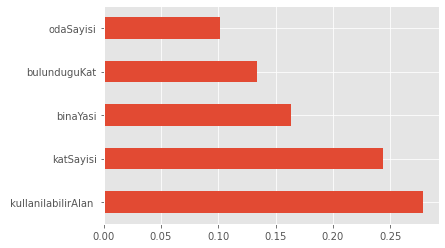

In [415]:
#öznitelik önemi
data = evVeriSeti.dropna()
X = data.drop("fiyat", axis=1) #independent columns #0'dan 20'ye kadar değerler
y = data["fiyat"]#bağımlı değişken
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class
#feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
#bundan sonraki satırlar bulduğumuz değerlerin histogram grafiği üzerinde gösterilmesi
feat_importances = pd.Series(model.feature_importances_, index=X.
columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [416]:
#en iyi öznitelikleri skorlandırma


bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
scores = pd.concat([dfcolumns,dfscores],axis=1)
scores.columns = ['özellikler','score']
print(scores.nlargest(5,'score')) #print the 5 best features

             özellikler     score
2              binaYasi  138.0000
0   kullanilabilirAlan    59.0214
3          bulunduguKat   11.9677
4             katSayisi    5.9014
5                 banyo    1.8421


In [417]:
evVeriSeti.head(100)

,kullanilabilirAlan,odaSayisi,binaYasi,bulunduguKat,katSayisi,banyo,fiyat
0,145,4,24,4,4,1.0,355000.0
1,170,4,0,5,6,1.0,1120000.0
2,185,5,0,1,9,2.0,1300000.0
5,130,4,9,4,7,1.0,650000.0
6,140,4,0,5,8,2.0,709000.0
7,190,5,0,1,6,2.0,1800000.0
8,165,4,9,1,7,2.0,660000.0
10,155,4,0,1,5,2.0,770000.0
11,120,3,24,2,3,1.0,465000.0
12,150,4,3,4,5,2.0,360000.0


<AxesSubplot:>

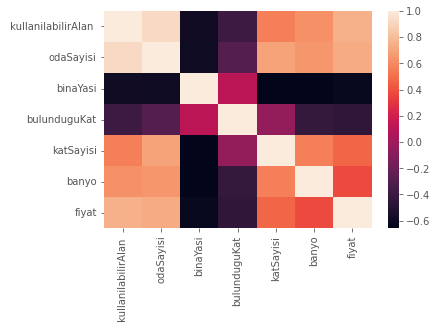

In [418]:
#Korelasyon Isı Haritası 
corr = evVeriSeti.corr()
sns.heatmap(corr,
xticklabels=corr.columns.values,
yticklabels=corr.columns.values)

#

In [419]:
#Verilerin Ölçeklendirilmesi


In [420]:
#standartlaştırma
stdscaler=StandardScaler()
evVeriSeti_stdscaled=pd.DataFrame(stdscaler.fit_transform(evVeriSeti),columns=evVeriSeti.columns)
evVeriSeti_stdscaled.head(100)

,kullanilabilirAlan,odaSayisi,binaYasi,bulunduguKat,katSayisi,banyo,fiyat
0,-0.3768,-0.1302,2.0241,0.8826,-1.1236,-1.1832,-1.1844
1,0.5275,-0.1302,-0.7518,1.5056,0.0489,-1.1832,0.6146
2,1.0700,1.4321,-0.7518,-0.9864,1.8076,0.8452,1.0378
3,-0.9193,-0.1302,0.2892,0.8826,0.6351,-1.1832,-0.4907
4,-0.5576,-0.1302,-0.7518,1.5056,1.2213,0.8452,-0.3520
5,1.2508,1.4321,-0.7518,-0.9864,0.0489,0.8452,2.2136
6,0.3466,-0.1302,0.2892,-0.9864,0.6351,0.8452,-0.4672
7,-0.0151,-0.1302,-0.7518,-0.9864,-0.5374,0.8452,-0.2085
8,-1.2810,-1.6925,2.0241,-0.3634,-1.7099,-1.1832,-0.9258
9,-0.1959,-0.1302,-0.4048,0.8826,-0.5374,0.8452,-1.1727


In [421]:
#Normalizasyon

In [422]:
mmsscaler=MinMaxScaler()
evVeriSeti_mmsscaled=pd.DataFrame(mmsscaler.fit_transform(evVeriSeti),columns=evVeriSeti.columns)
evVeriSeti_mmsscaled.head(100)

,kullanilabilirAlan,odaSayisi,binaYasi,bulunduguKat,katSayisi,banyo,fiyat
0,0.3684,0.5,1.000,0.75,0.1667,0.0,0.0000
1,0.6316,0.5,0.000,1.00,0.5000,0.0,0.5294
2,0.7895,1.0,0.000,0.00,1.0000,1.0,0.6540
3,0.2105,0.5,0.375,0.75,0.6667,0.0,0.2042
4,0.3158,0.5,0.000,1.00,0.8333,1.0,0.2450
5,0.8421,1.0,0.000,0.00,0.5000,1.0,1.0000
6,0.5789,0.5,0.375,0.00,0.6667,1.0,0.2111
7,0.4737,0.5,0.000,0.00,0.3333,1.0,0.2872
8,0.1053,0.0,1.000,0.25,0.0000,0.0,0.0761
9,0.4211,0.5,0.125,0.75,0.3333,1.0,0.0035


In [423]:
evVeriSeti.describe() #veri setine istatiksel olarak bak(betimleyi istastikler)

#mean: sütunların ortalama değerleri
#std: standart sapma
#min:minimum değer
#25%:Medyan ile min değer arasındaki değer
#50%:medyan
#75%:Medyan ile max değer arasındaki değer
#max:maksimum değer

,kullanilabilirAlan,odaSayisi,binaYasi,bulunduguKat,katSayisi,banyo,fiyat
count,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,1.2000e+01
mean,155.4167,4.0833,6.5000,2.5833,5.9167,1.5833,8.5867e+05
std,28.8774,0.6686,9.0303,1.6765,1.7816,0.5149,4.4415e+05
min,110.0000,3.0000,0.0000,1.0000,3.0000,1.0000,3.5500e+05
25%,137.5000,4.0000,0.0000,1.0000,4.7500,1.0000,6.0375e+05
50%,152.5000,4.0000,1.5000,2.0000,6.0000,2.0000,7.3700e+05
75%,173.7500,4.2500,9.0000,4.0000,7.0000,2.0000,1.1650e+06
max,205.0000,5.0000,24.0000,5.0000,9.0000,2.0000,1.8000e+06


In [424]:
#mod
evVeriSeti_mod=evVeriSeti.mode()
evVeriSeti_mod.head(1)

,kullanilabilirAlan,odaSayisi,binaYasi,bulunduguKat,katSayisi,banyo,fiyat
0,110,4.0,0.0,1.0,7.0,2.0,355000.0


In [425]:
#medyan
evVeriSeti.median()

 kullanilabilirAlan        152.5
odaSayisi                    4.0
binaYasi                     1.5
bulunduguKat                 2.0
katSayisi                    6.0
banyo                        2.0
fiyat                   737000.0
dtype: float64

In [426]:
#artimatik ortalama
evVeriSeti.mean()

 kullanilabilirAlan        155.4167
odaSayisi                    4.0833
binaYasi                     6.5000
bulunduguKat                 2.5833
katSayisi                    5.9167
banyo                        1.5833
fiyat                   858666.6667
dtype: float64

In [427]:
#standart sapma
evVeriSeti.std()

 kullanilabilirAlan         28.8774
odaSayisi                    0.6686
binaYasi                     9.0303
bulunduguKat                 1.6765
katSayisi                    1.7816
banyo                        0.5149
fiyat                   444149.3060
dtype: float64

In [428]:
#kovaryans
evVeriSeti.cov()

,kullanilabilirAlan,odaSayisi,binaYasi,bulunduguKat,katSayisi,banyo,fiyat
kullanilabilirAlan,8.3390e+02,17.6894,-1.5159e+02,-18.9015,28.6742,9.2803,9.6065e+06
odaSayisi,1.7689e+01,0.4470,-3.5909e+00,-0.3258,0.8258,0.2197,2.1467e+05
binaYasi,-1.5159e+02,-3.5909,8.1545e+01,1.5909,-10.5909,-3.0455,-2.5037e+06
bulunduguKat,-1.8902e+01,-0.3258,1.5909e+00,2.8106,-0.1288,-0.3712,-3.3397e+05
katSayisi,2.8674e+01,0.8258,-1.0591e+01,-0.1288,3.1742,0.5076,3.7015e+05
banyo,9.2803e+00,0.2197,-3.0455e+00,-0.3712,0.5076,0.2652,8.5303e+04
fiyat,9.6065e+06,214666.6667,-2.5037e+06,-333969.6970,370151.5152,85303.0303,1.9727e+11


In [429]:
#korelasyon
evVeriSeti.corr()

,kullanilabilirAlan,odaSayisi,binaYasi,bulunduguKat,katSayisi,banyo,fiyat
kullanilabilirAlan,1.0000,0.9163,-0.5813,-0.3904,0.5573,0.6241,0.7490
odaSayisi,0.9163,1.0000,-0.5948,-0.2906,0.6933,0.6382,0.7229
binaYasi,-0.5813,-0.5948,1.0000,0.1051,-0.6583,-0.6549,-0.6242
bulunduguKat,-0.3904,-0.2906,0.1051,1.0000,-0.0431,-0.4300,-0.4485
katSayisi,0.5573,0.6933,-0.6583,-0.0431,1.0000,0.5533,0.4678
banyo,0.6241,0.6382,-0.6549,-0.4300,0.5533,1.0000,0.3730
fiyat,0.7490,0.7229,-0.6242,-0.4485,0.4678,0.3730,1.0000
